In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
%matplotlib inline
from datetime import datetime
import baostock as bs
import warnings  #屏蔽报红
warnings.filterwarnings("ignore")

In [2]:
def get_data(code):
    end = datetime.now()
    start = datetime(end.year - 3, end.month, end.day).strftime('%Y-%m-%d')
    end = end.strftime('%Y-%m-%d')
    # 登陆系统
    lg = bs.login()
    # 获取沪深A股历史K线数据
    rs_result = bs.query_history_k_data_plus(
            code,
            fields="date,open,high,low,close,volume",
            start_date=start, 
            end_date=end, 
            frequency="d", 
            adjustflag="3")
    df_result = rs_result.get_data()
    # 登出系统
    bs.logout()
    df_result['date'] = df_result['date'].map(lambda x: datetime.strptime(x,'%Y-%m-%d'))
    _res = df_result.set_index('date')
    res = _res.applymap(lambda x: float(x))
    return res


In [3]:
liquor_list = ['sh.600519', 'sz.000858', 
               'sz.002304', 'sh.600809']
# 贵州茅台，五粮液， 洋河股份，山西汾酒
company_name = ['maotai','wuliangye','yanghe','fenjiu']
for name, code in zip(company_name ,liquor_list):
    exec(f"{name}=get_data(code)")


login success!
logout success!
login success!
logout success!
login success!
logout success!
login success!
logout success!


In [4]:
# 需要批量赋值的变量名称
company_list = [maotai, wuliangye, yanghe, fenjiu]
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
# 将四支股票数据进行纵向合并
df = pd.concat(company_list, axis=0)
df.tail(10)
df.to_csv("orginal_data.csv")

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS


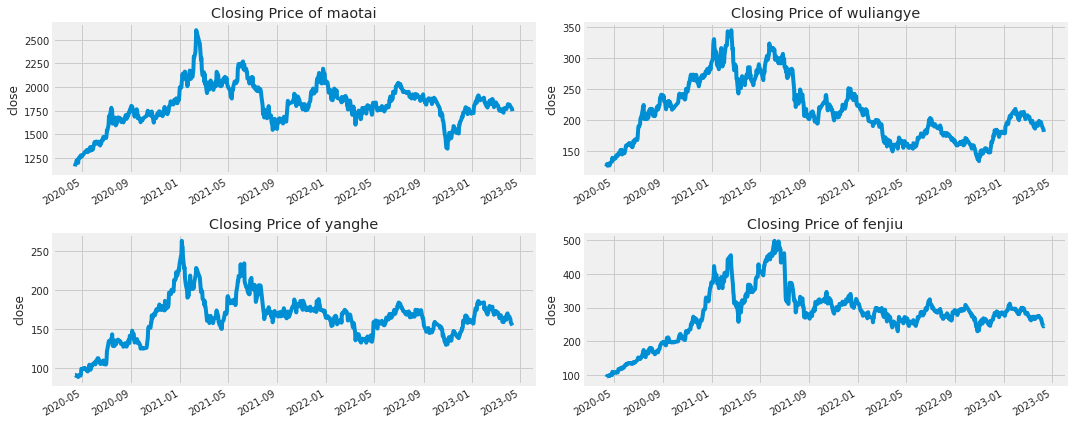

In [5]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['close'].plot()
    plt.ylabel('close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company_name[i - 1]}")  
plt.tight_layout()


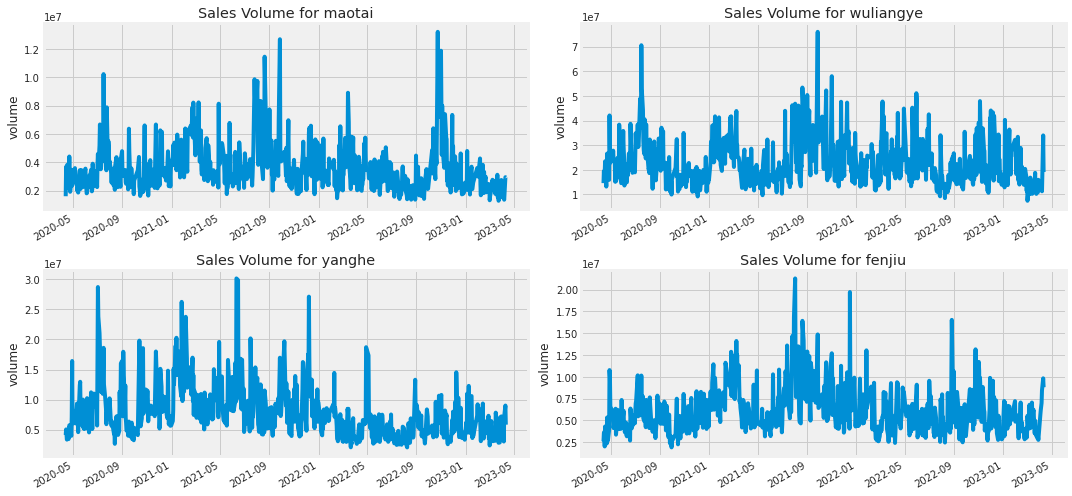

In [6]:
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['volume'].plot()
    plt.ylabel('volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {company_name[i - 1]}") 
plt.tight_layout()


In [7]:
# 设置移动天数
ma_day = [10, 20, 50]
for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['close'].rolling(ma).mean()


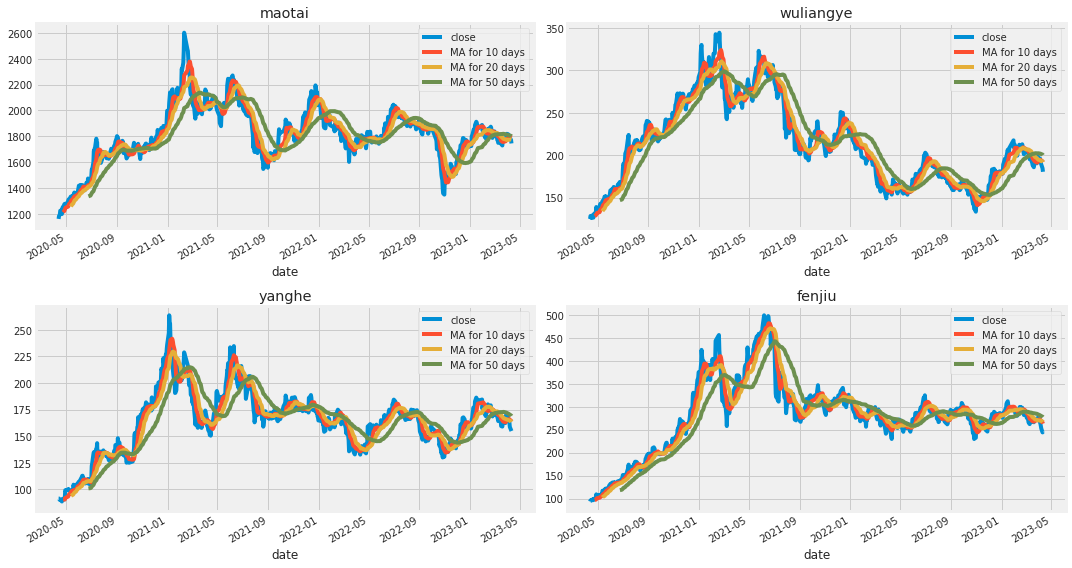

In [8]:
#plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
#plt.rcParams['axes.unicode_minus'] = False  # 解决图像显示为方块的问题
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)
maotai[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('maotai')

wuliangye[['close', 'MA for 10 days', 
          'MA for 20 days', 'MA for 50 days']
          ].plot(ax=axes[0,1])
axes[0,1].set_title('wuliangye')

yanghe[['close', 'MA for 10 days', 
        'MA for 20 days', 'MA for 50 days']
        ].plot(ax=axes[1,0])
axes[1,0].set_title('yanghe')

fenjiu[['close', 'MA for 10 days', 
        'MA for 20 days', 'MA for 50 days']
        ].plot(ax=axes[1,1])
axes[1,1].set_title('fenjiu')
fig.tight_layout()


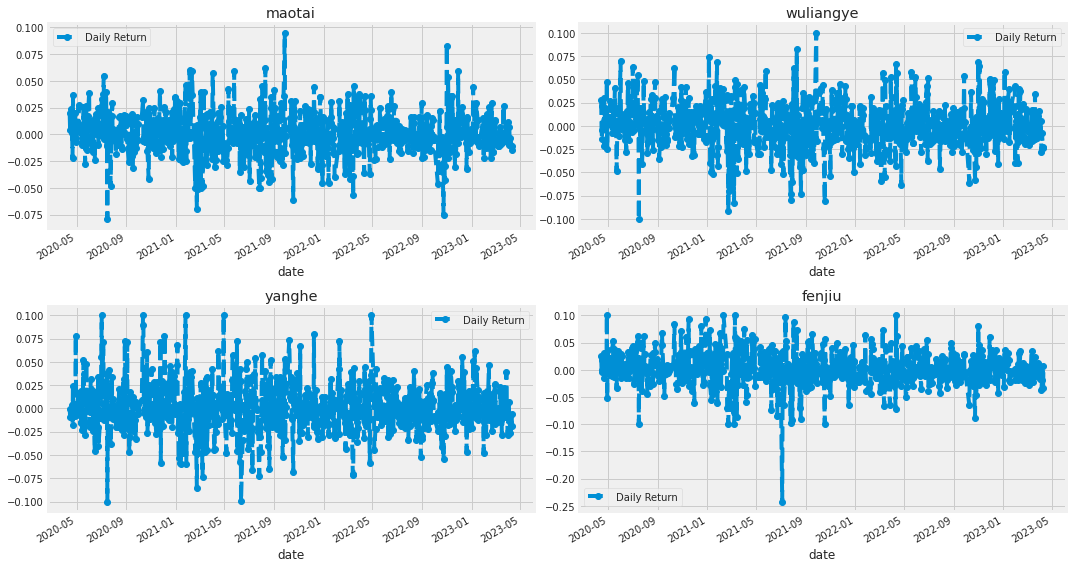

In [9]:
for company in company_list:
    company['Daily Return'] = company['close'].pct_change()
# 画出日收益率
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)
maotai['Daily Return'].plot(ax=axes[0,0], legend=True, 
                            linestyle='--', marker='o')
axes[0,0].set_title('maotai')
wuliangye['Daily Return'].plot(ax=axes[0,1], legend=True, 
                               linestyle='--', marker='o')
axes[0,1].set_title('wuliangye')
yanghe['Daily Return'].plot(ax=axes[1,0], legend=True, 
                            linestyle='--', marker='o')
axes[1,0].set_title('yanghe')
fenjiu['Daily Return'].plot(ax=axes[1,1], legend=True, 
                            linestyle='--', marker='o')
axes[1,1].set_title('fenjiu')
fig.tight_layout()


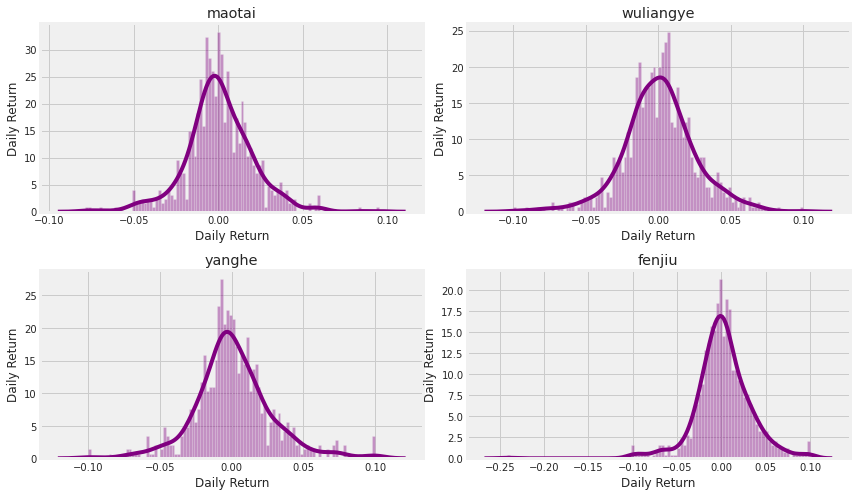

In [10]:
# 这里使用了dropna()，否则seaborn无法读取NaN值
plt.figure(figsize=(12, 7))
company_name_c = ['maotai','wuliangye','yanghe','fenjiu']
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name_c[i - 1]}')
# 也可以这样绘制
# maotai['Daily Return'].hist()
plt.tight_layout();


In [11]:
index = maotai.index
closing_df = pd.DataFrame()
for company, company_n in zip(company_list,company_name_c):
    temp_df = pd.DataFrame(index=company.index,
                           data = company['close'].values ,
                           columns=[company_n])
    closing_df = pd.concat([closing_df,temp_df],axis=1)
# 看看数据
closing_df.head() 


,maotai,wuliangye,yanghe,fenjiu
date,,,,
2020-04-13,1162.3,125.00,91.30,93.71
2020-04-14,1185.1,128.45,91.28,96.10
2020-04-15,1189.6,127.91,90.48,96.07
2020-04-16,1197.1,126.10,89.97,95.66
2020-04-17,1226.0,128.82,89.76,97.45


In [12]:
liquor_rets = closing_df.pct_change()
liquor_rets.head()


,maotai,wuliangye,yanghe,fenjiu
date,,,,
2020-04-13,NaN,NaN,NaN,NaN
2020-04-14,0.019616,0.027600,-0.000219,0.025504
2020-04-15,0.003797,-0.004204,-0.008764,-0.000312
2020-04-16,0.006305,-0.014151,-0.005637,-0.004268
2020-04-17,0.024142,0.021570,-0.002334,0.018712


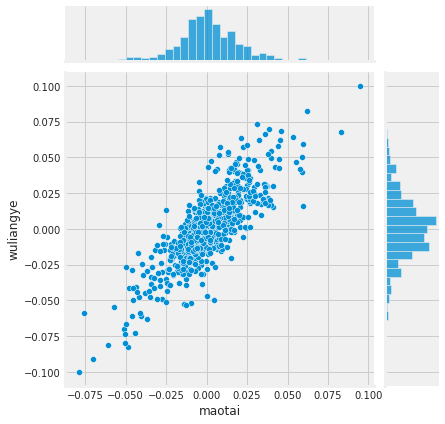

In [13]:
sns.jointplot('maotai', 'wuliangye', 
              liquor_rets, kind='scatter')


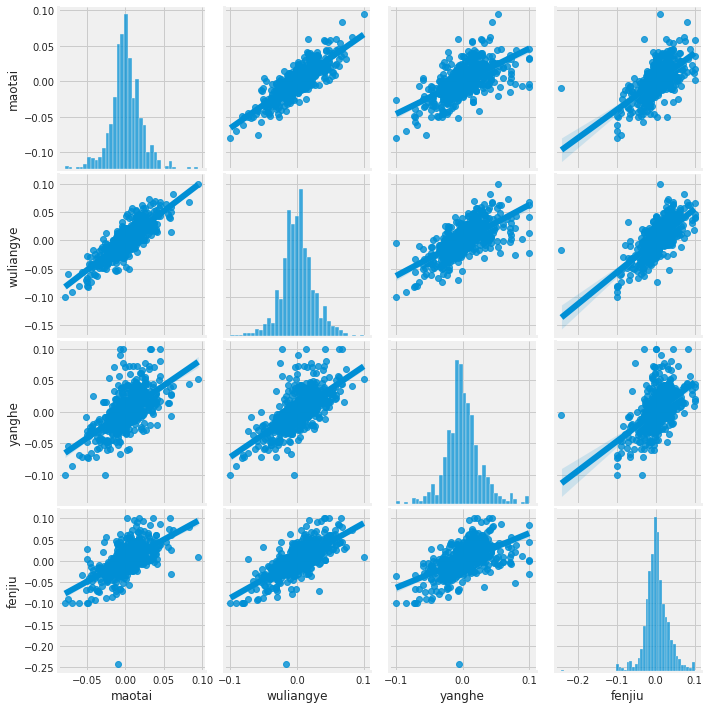

In [14]:
sns.pairplot(liquor_rets, kind='reg')


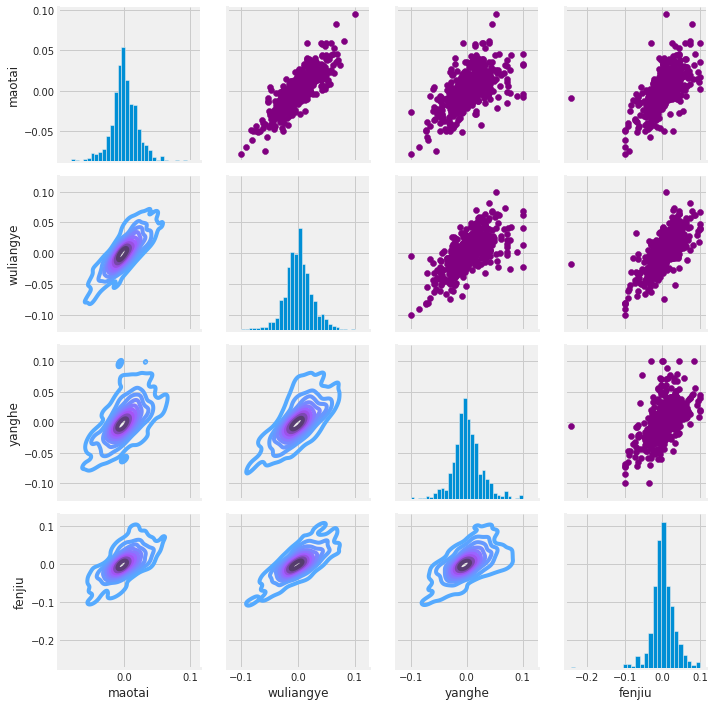

In [15]:
# 通过命名为returns_fig来设置我们的图形，
# 在DataFrame上调用PairPLot
return_fig = sns.PairGrid(liquor_rets.dropna())
# 使用map_upper，我们可以指定上面的三角形是什么样的。
return_fig.map_upper(plt.scatter, color='purple')
# 我们还可以定义图中较低的三角形，
# 包括绘图类型(kde)或颜色映射(blueppurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
# 最后，我们将把对角线定义为每日收益的一系列直方图
return_fig.map_diag(plt.hist, bins=30)


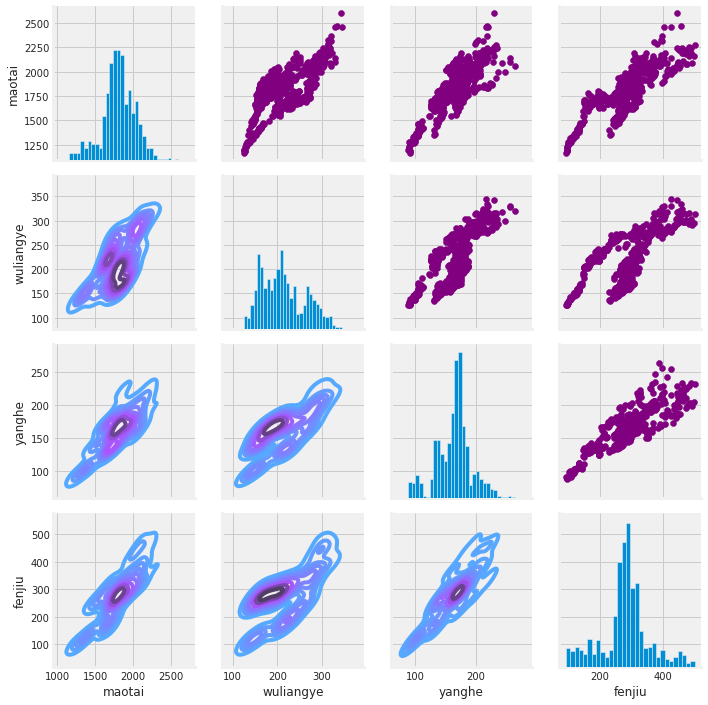

In [16]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)


<AxesSubplot:>

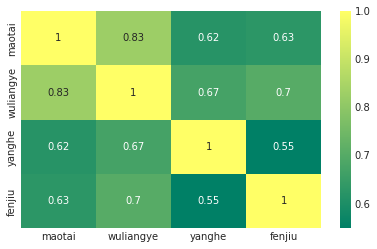

In [17]:
# 让我们用sebron来做一个每日收益的快速相关图
sns.heatmap(liquor_rets.corr(), 
            annot=True, cmap='summer')


<AxesSubplot:>

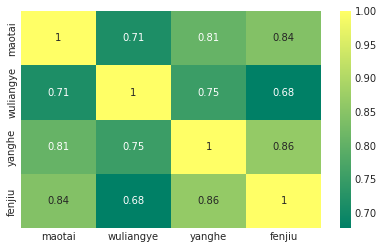

In [18]:
sns.heatmap(closing_df.corr(), 
            annot=True, cmap='summer')


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS


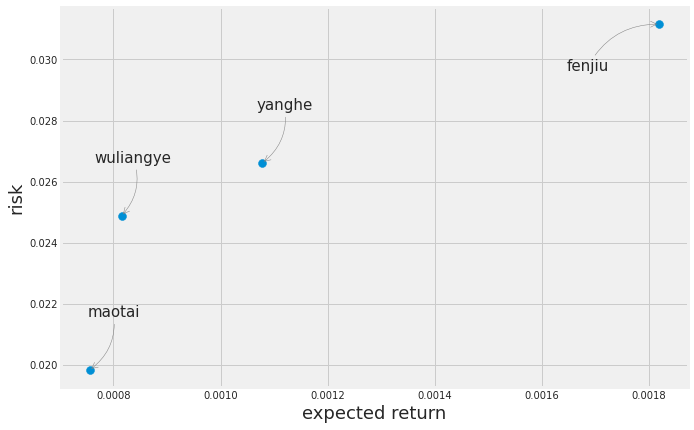

In [19]:
# 让我们首先将一个新的DataFrame定义为原始liquor_rets的 DataFrame的压缩版本
rets = liquor_rets.dropna()
area = np.pi * 20
plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('expected return',fontsize=18)
plt.ylabel('risk',fontsize=18)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    if label == 'fenjiu':
        xytext=(-50,-50)
    else:
        xytext=(50,50)
    plt.annotate(label, xy=(x, y), xytext=xytext, 
                 textcoords='offset points', 
                 ha='right', va='bottom', fontsize=15,
                 arrowprops=dict(arrowstyle='->', 
                                 color='gray', 
                                 connectionstyle='arc3,rad=-0.3'))


In [20]:
# 获取股票报价
df = maotai.loc[:,['open','high','low','close','volume']]
df.head()


,open,high,low,close,volume
date,,,,,
2020-04-13,1165.00,1169.98,1148.50,1162.3,1598147.0
2020-04-14,1176.00,1191.55,1166.00,1185.1,3679955.0
2020-04-15,1192.00,1203.99,1187.10,1189.6,2933229.0
2020-04-16,1192.97,1197.10,1184.10,1197.1,2172774.0
2020-04-17,1210.00,1234.56,1205.01,1226.0,3824569.0


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS


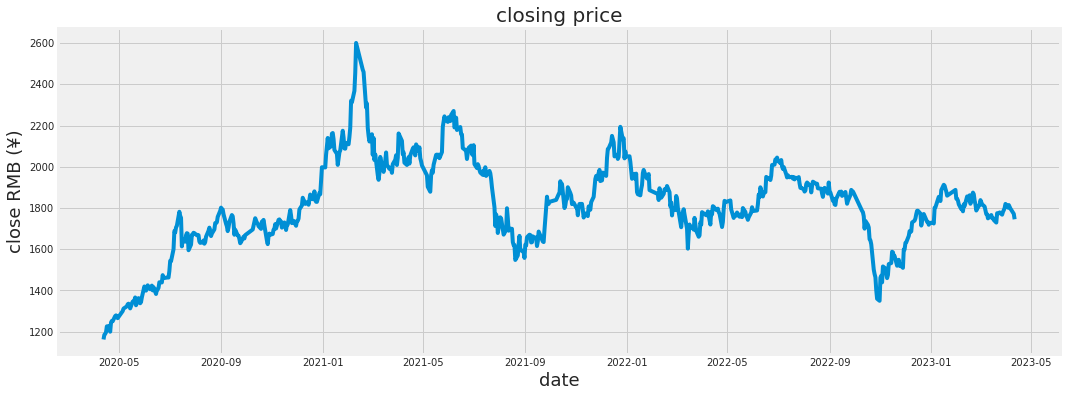

In [21]:
plt.figure(figsize=(16,6))
plt.title('closing price',fontsize=20)
plt.plot(df['close'])
plt.xlabel('date', fontsize=18)
plt.ylabel('close RMB (¥)', fontsize=18)
plt.show()


In [22]:
# 创建一个只有收盘价的新数据帧
data = df.filter(['close'])
# 将数据帧转换为numpy数组
dataset = data.values
# 获取要对模型进行训练的行数
training_data_len = int(np.ceil( len(dataset) * .95 ))
# 数据标准化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
# 创建训练集，训练标准化训练集
train_data = scaled_data[0:int(training_data_len), :]
# 将数据拆分为x_train和y_train数据集
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)     
# 将x_train和y_train转换为numpy数组 
x_train, y_train = np.array(x_train), np.array(y_train)
# Reshape数据
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

df = pd.DataFrame(train_data)
df.to_csv('train_data.csv')

[array([0.        , 0.01584764, 0.01897546, 0.0241885 , 0.04427608,
       0.04517968, 0.02620421, 0.05713491, 0.06252867, 0.06134705,
       0.07902968, 0.08120525, 0.0782651 , 0.07187044, 0.09571141,
       0.10405227, 0.10586641, 0.11170501, 0.11864878, 0.12069924,
       0.11419337, 0.10474734, 0.12783068, 0.12776117, 0.13116008,
       0.14165566, 0.11531243, 0.13943143, 0.13602558, 0.12212414,
       0.12629457, 0.1420032 , 0.1787725 , 0.17266282, 0.16473205,
       0.17077222, 0.1825954 , 0.16945854, 0.17672204, 0.181664  ,
       0.16553833, 0.17659693, 0.15340238, 0.16791548, 0.16869396,
       0.17425454, 0.19291027, 0.19232641, 0.21700146, 0.20692987,
       0.20912629, 0.20892472, 0.23074303, 0.26530896, 0.26377285,
       0.30423299, 0.36539932, 0.36077014, 0.37791061, 0.38336693])]
[0.4307291304650033]
[array([0.        , 0.01584764, 0.01897546, 0.0241885 , 0.04427608,
       0.04517968, 0.02620421, 0.05713491, 0.06252867, 0.06134705,
       0.07902968, 0.08120525, 0.0782

Using TensorFlow backend.


Epoch 1/20
632/632 [==============================] - 6s 10ms/step - loss: 0.0070
Epoch 2/20
632/632 [==============================] - 6s 10ms/step - loss: 0.0024
Epoch 3/20
632/632 [==============================] - 6s 10ms/step - loss: 0.0024
Epoch 4/20
632/632 [==============================] - 6s 10ms/step - loss: 0.0018
Epoch 5/20
632/632 [==============================] - 6s 10ms/step - loss: 0.0014
Epoch 6/20
632/632 [==============================] - 6s 10ms/step - loss: 0.0015
Epoch 7/20
632/632 [==============================] - 6s 9ms/step - loss: 0.0011
Epoch 8/20
632/632 [==============================] - 6s 10ms/step - loss: 0.0011
Epoch 9/20
632/632 [==============================] - 7s 10ms/step - loss: 9.7955e-04
Epoch 10/20
632/632 [==============================] - 7s 11ms/step - loss: 0.0011
Epoch 11/20
632/632 [==============================] - 7s 11ms/step - loss: 9.5091e-04
Epoch 12/20
632/632 [==============================] - 7s 12ms/step - loss: 0.0011
Epoch 

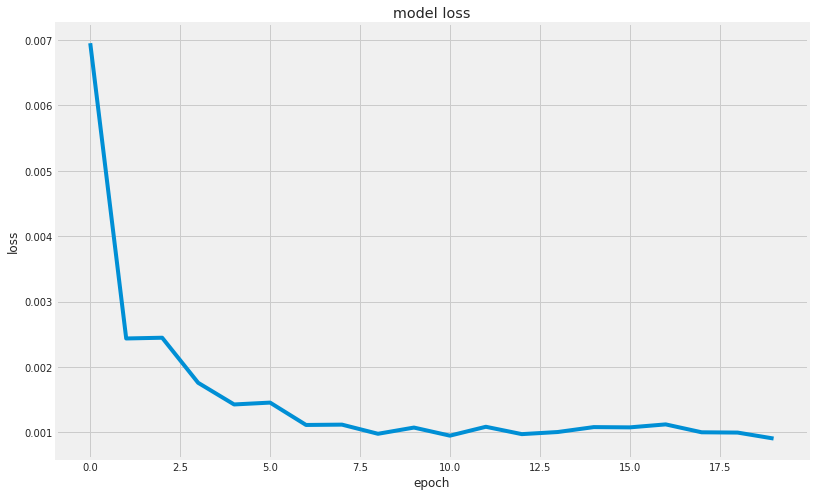

In [23]:
# pip install keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
# 建立LSTM模型
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
# 编译模型
model.compile(optimizer='adam', loss='mean_squared_error')
# 训练模型
history=model.fit(x_train, y_train, batch_size=3, epochs=20)
#train_pred = model.predict(x_train)
fig1 = plt.figure(figsize=(12, 8))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [24]:
# 创建测试数据集
# 创建一个新的数组，包含从索引的缩放值
test_data = scaled_data[training_data_len - 60: , :]
# 创建数据集x_test和y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])    
# 将数据转换为numpy数组
x_test = np.array(x_test)
# 重塑的数据
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
# 得到模型的预测值 
test_pred = model.predict(x_test)
test_pred = scaler.inverse_transform(test_pred)

df = pd.DataFrame(test_data)
df.to_csv('test_data.csv')

In [25]:
from sklearn import metrics
# MSE
print("MSE: %.4f" %(metrics.mean_squared_error(y_test,test_pred)))     
# RMSE
print("RMSE: %.4f" %(np.sqrt(metrics.mean_squared_error(y_test,test_pred))))       
# MAE
print("MAE: %.4f" %(metrics.mean_absolute_error(y_test,test_pred))) 
# R2_Score
print("R2_Score: %.4f" % (metrics.r2_score(y_test,test_pred)))

MSE: 354.4309
RMSE: 18.8263
MAE: 14.8026
R2_Score: 0.6819


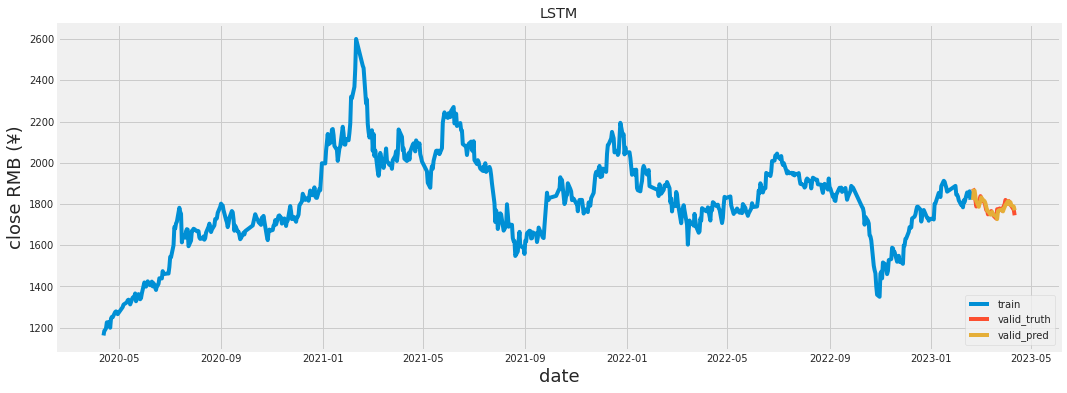

In [26]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = test_pred
plt.figure(figsize=(16,6))
plt.title('LSTM')
plt.xlabel('date', fontsize=18)
plt.ylabel('close RMB (¥)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['train', 'valid_truth', 'valid_pred'], loc='lower right')
plt.show()


In [27]:
valid

,close,Predictions
date,,
2023-02-20,1875.00,1819.967529
2023-02-21,1867.00,1866.102539
2023-02-22,1836.00,1864.733521
2023-02-23,1818.00,1833.965332
2023-02-24,1788.00,1814.620728
2023-02-27,1810.41,1786.755127
2023-02-28,1813.74,1804.652710
2023-03-01,1838.53,1810.362793
2023-03-02,1828.00,1832.462891
